# So Sánh NDVI Lần 1 vs Lần 2 Theo Tháng (Grouped Bar Chart)

**Biểu đồ chuẩn**: X = Tháng (1-12), Y = NDVI Mean, mỗi tháng có 2 cột (Lần 1, Lần 2)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.size'] = 10

print("✓ Import thành công!")


✓ Import thành công!


## 1. Load và Chuẩn Bị Dữ Liệu

In [ ]:
df = pd.read_csv('final_2016_2025_NDVI.csv')

df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['year_month'] = df['start_date'].dt.to_period('M')

df = df.sort_values(['GID_2', 'start_date'])
df['obs_num'] = df.groupby(['GID_2', 'year_month']).cumcount() + 1

print(f"Tổng số bản ghi: {len(df):,}")
print(f"Số tỉnh: {df['NAME_1'].nunique()}")


Tổng số bản ghi: 28,108
Số tỉnh: 13


In [ ]:
# Tách và merge
complete_data = df.groupby(['GID_2', 'year_month']).filter(lambda x: len(x) == 2)

obs1 = complete_data[complete_data['obs_num'] == 1][[
    'NAME_1', 'GID_1', 'NAME_2', 'GID_2', 'year', 'month', 'year_month', 'mean'
]].rename(columns={'mean': 'mean_1'})

obs2 = complete_data[complete_data['obs_num'] == 2][[
    'GID_2', 'year_month', 'mean'
]].rename(columns={'mean': 'mean_2'})

comparison = pd.merge(obs1, obs2, on=['GID_2', 'year_month'], how='inner')

# Tổng hợp theo tỉnh và tháng (trung bình qua các năm và huyện)
monthly_by_province = comparison.groupby(['NAME_1', 'month']).agg({
    'mean_1': 'mean',
    'mean_2': 'mean',
    'GID_2': 'count'
}).rename(columns={'GID_2': 'count'}).reset_index()

provinces = sorted(monthly_by_province['NAME_1'].unique())
print(f"\nSố tỉnh: {len(provinces)}")
print(f"Danh sách: {provinces}")



Số tỉnh: 13
Danh sách: ['An Giang', 'Bạc Liêu', 'Bến Tre', 'Cà Mau', 'Cần Thơ', 'Hậu Giang', 'Kiên Giang', 'Long An', 'Sóc Trăng', 'Tiền Giang', 'Trà Vinh', 'Vĩnh Long', 'Đồng Tháp']


## 2. Hàm Vẽ Grouped Bar Chart

In [ ]:
def plot_province_grouped_bar(province_name, figsize=(12, 6)):
    """
    Vẽ grouped bar chart cho 1 tỉnh
    X-axis: Tháng 1-12
    Y-axis: NDVI Mean
    Bars: Lần 1 (xanh) và Lần 2 (đỏ) cho mỗi tháng
    """
    # Get data
    data = monthly_by_province[monthly_by_province['NAME_1'] == province_name].copy()
    
    if len(data) == 0:
        print(f"⚠️ Không có dữ liệu cho: {province_name}")
        return None
    
    # Ensure all 12 months
    all_months = pd.DataFrame({'month': range(1, 13)})
    data = all_months.merge(data, on='month', how='left')
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    x = np.arange(1, 13)
    width = 0.35
    
    # Plot bars
    bars1 = ax.bar(x - width/2, data['mean_1'], width, label='Lần 1', 
                   color='#5470C6', alpha=0.85, edgecolor='black', linewidth=0.8)
    bars2 = ax.bar(x + width/2, data['mean_2'], width, label='Lần 2', 
                   color='#EE6666', alpha=0.85, edgecolor='black', linewidth=0.8)
    
    # Styling
    ax.set_xlabel('Tháng', fontsize=12, fontweight='bold')
    ax.set_ylabel('NDVI Mean', fontsize=12, fontweight='bold')
    ax.set_title(f'So Sánh NDVI Theo Tháng - {province_name}\n(Grouped Bar Chart)', 
                fontweight='bold', fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(months_labels)
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(alpha=0.3, axis='y', linestyle='--')
    ax.set_axisbelow(True)
    
    # Set y-axis to start from 0 or slightly below min
    y_min = min(data[['mean_1', 'mean_2']].min().min() - 0.05, 0)
    y_max = data[['mean_1', 'mean_2']].max().max() + 0.05
    ax.set_ylim(y_min, y_max)
    
    plt.tight_layout()
    
    return fig


## 3. Ví Dụ: Vẽ Một Tỉnh

Ví dụ: An Giang



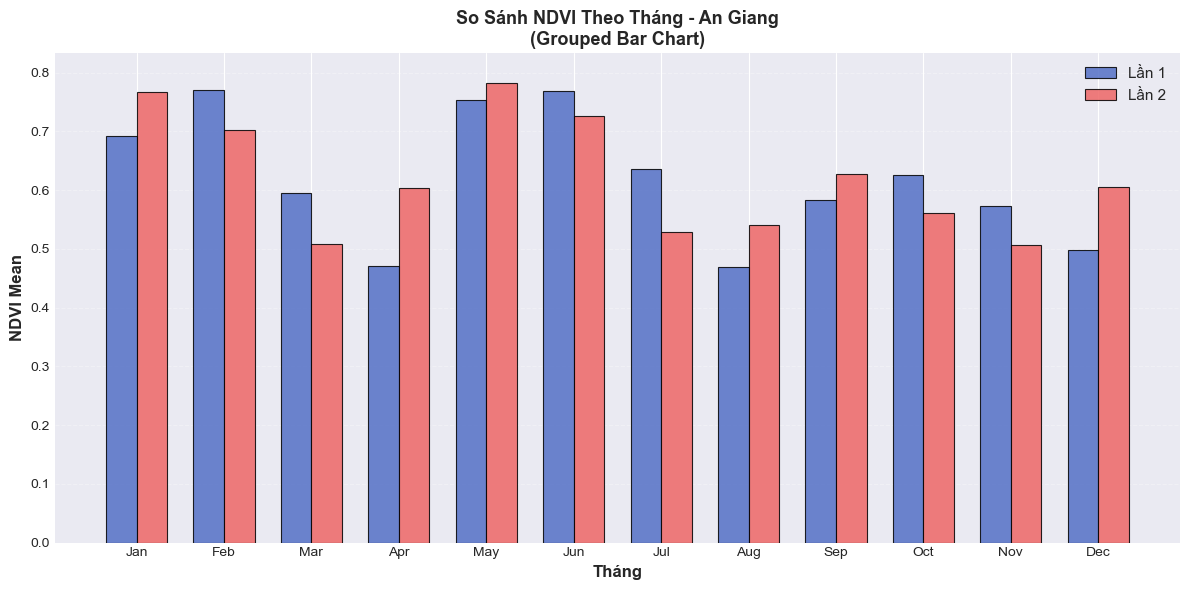

In [ ]:
# Vẽ tỉnh đầu tiên làm ví dụ
sample_province = provinces[0]
print(f"Ví dụ: {sample_province}\n")

fig = plot_province_grouped_bar(sample_province)
if fig:
    plt.show()


## 4. Vẽ TẤT CẢ Các Tỉnh (Từng Tỉnh Một)

Đang vẽ grouped bar chart cho 13 tỉnh...

[1/13] An Giang


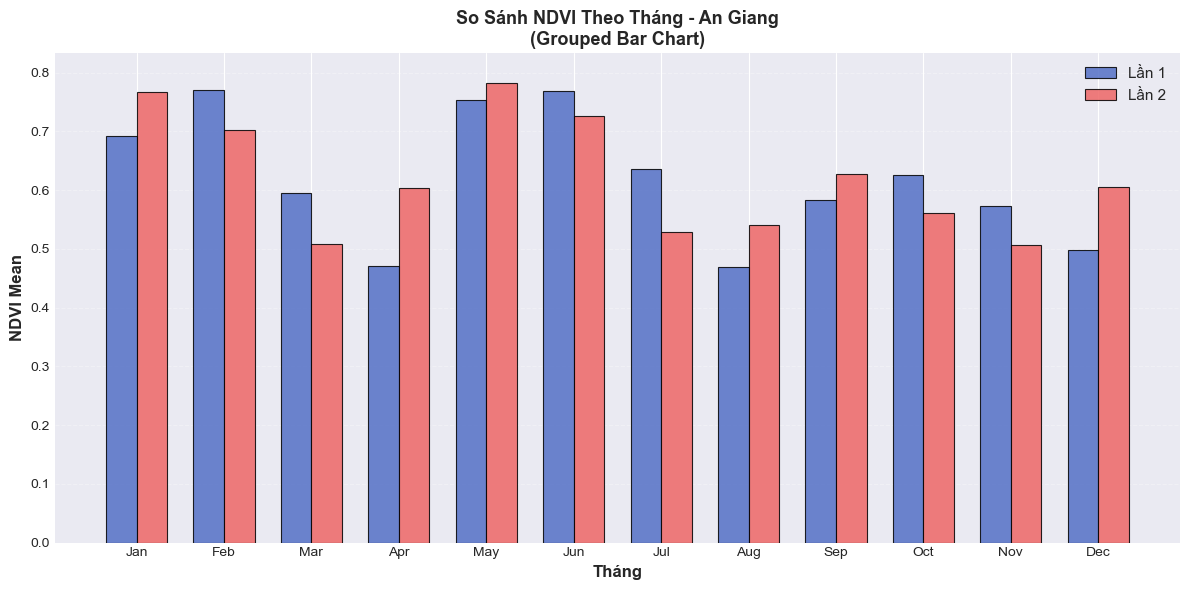


[2/13] Bạc Liêu


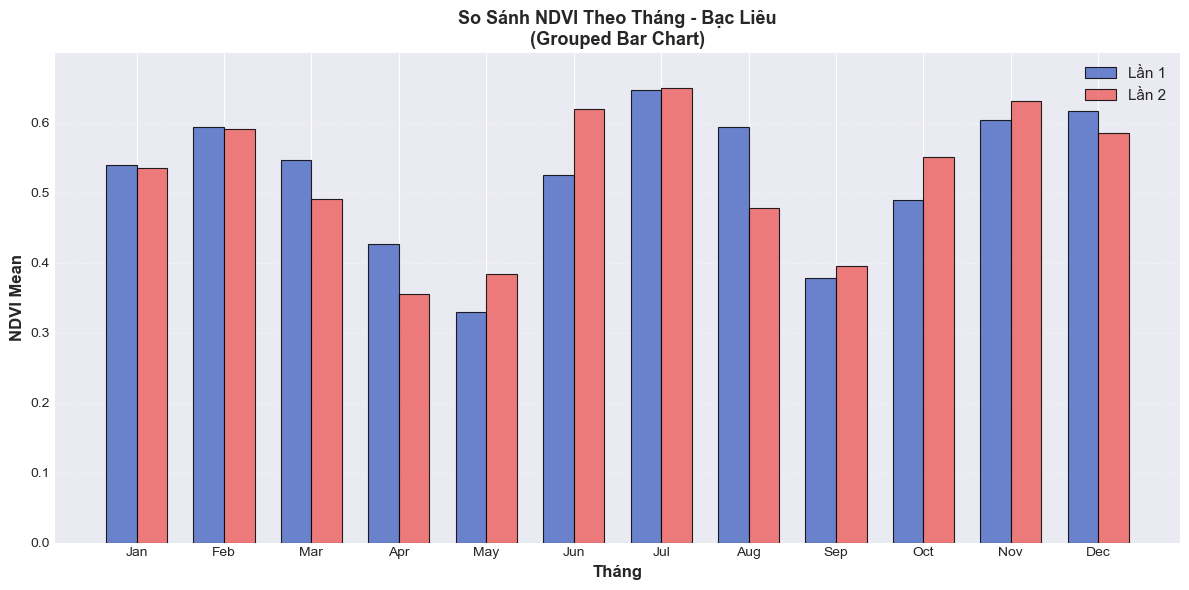


[3/13] Bến Tre


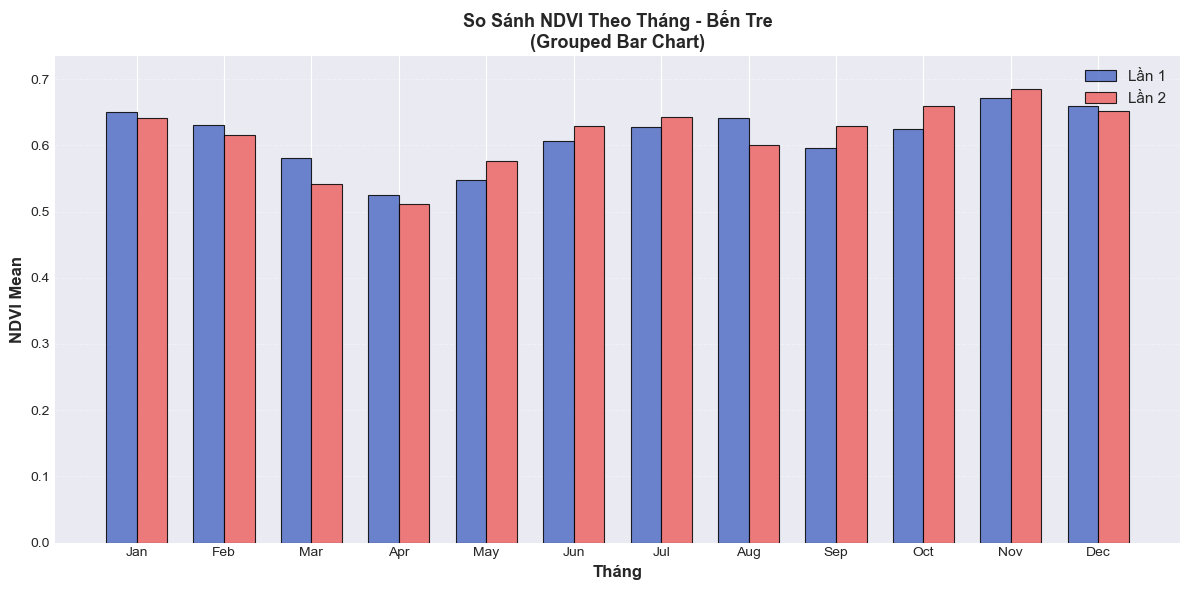


[4/13] Cà Mau


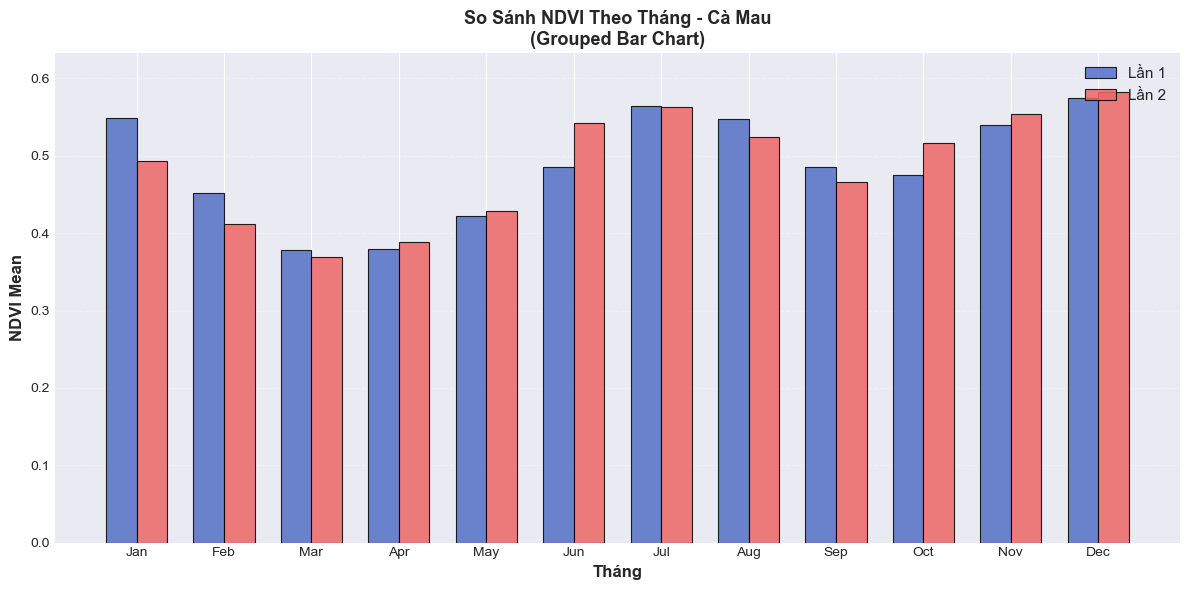


[5/13] Cần Thơ


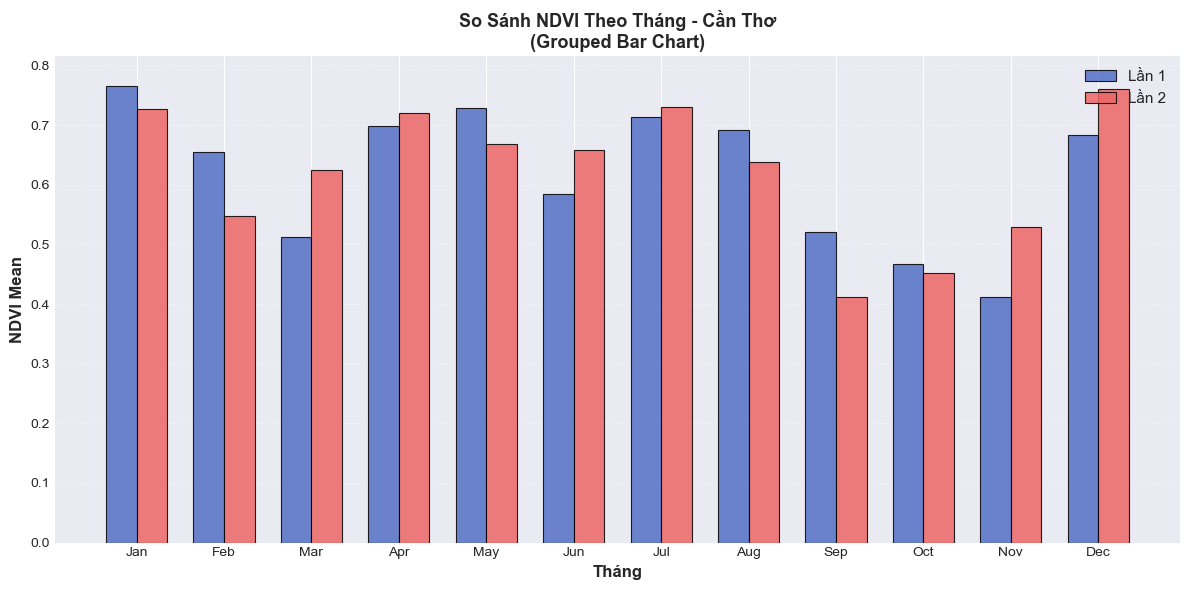


[6/13] Hậu Giang


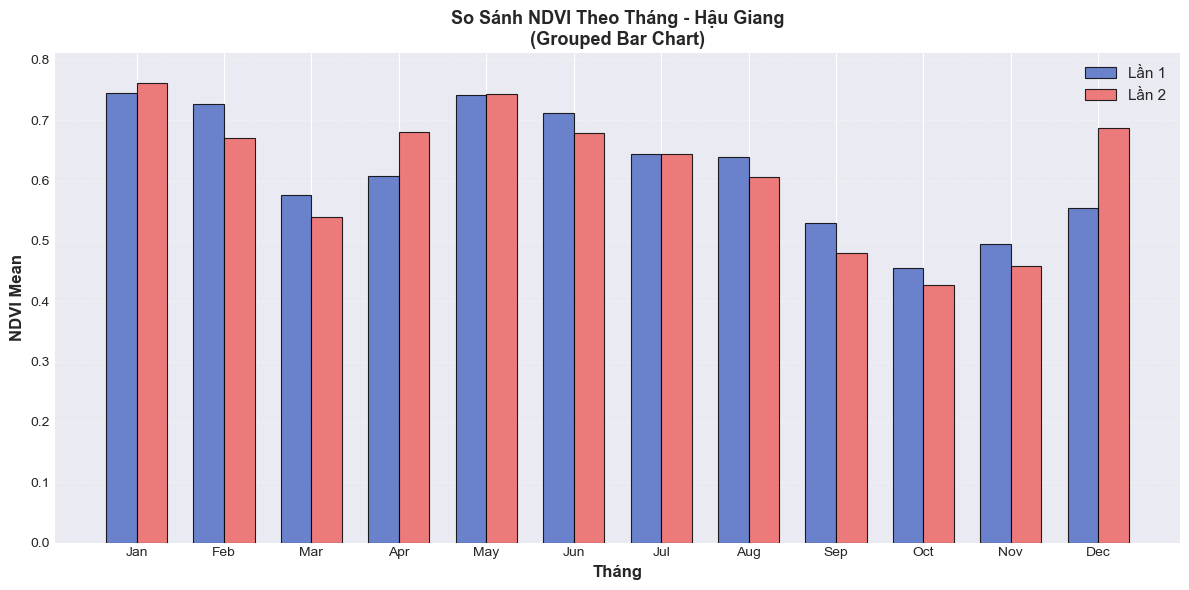


[7/13] Kiên Giang


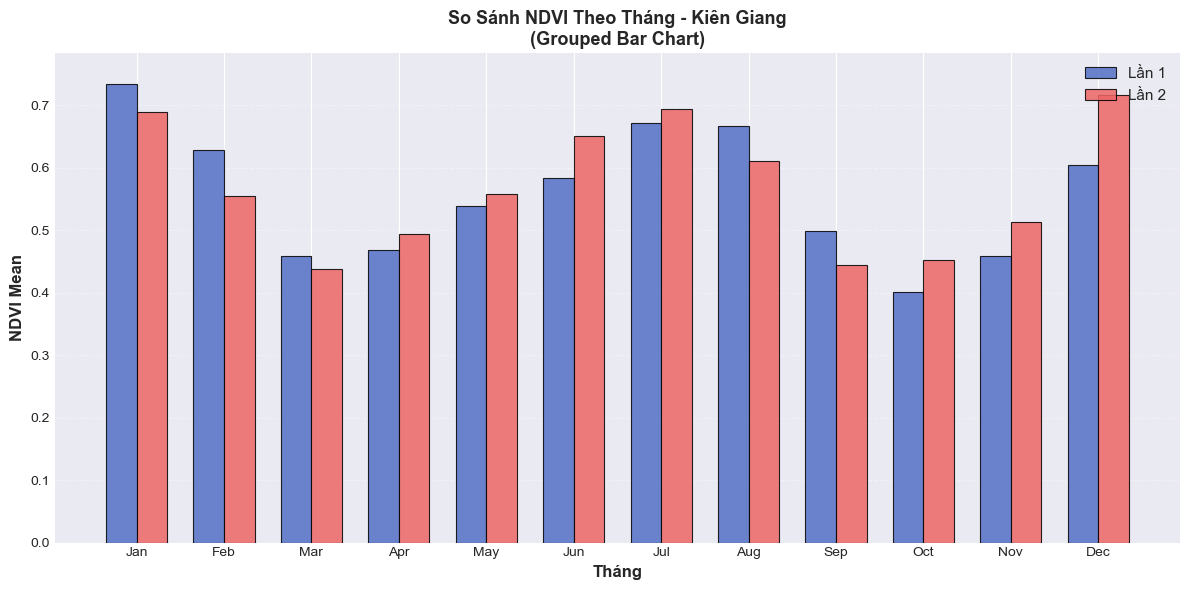


[8/13] Long An


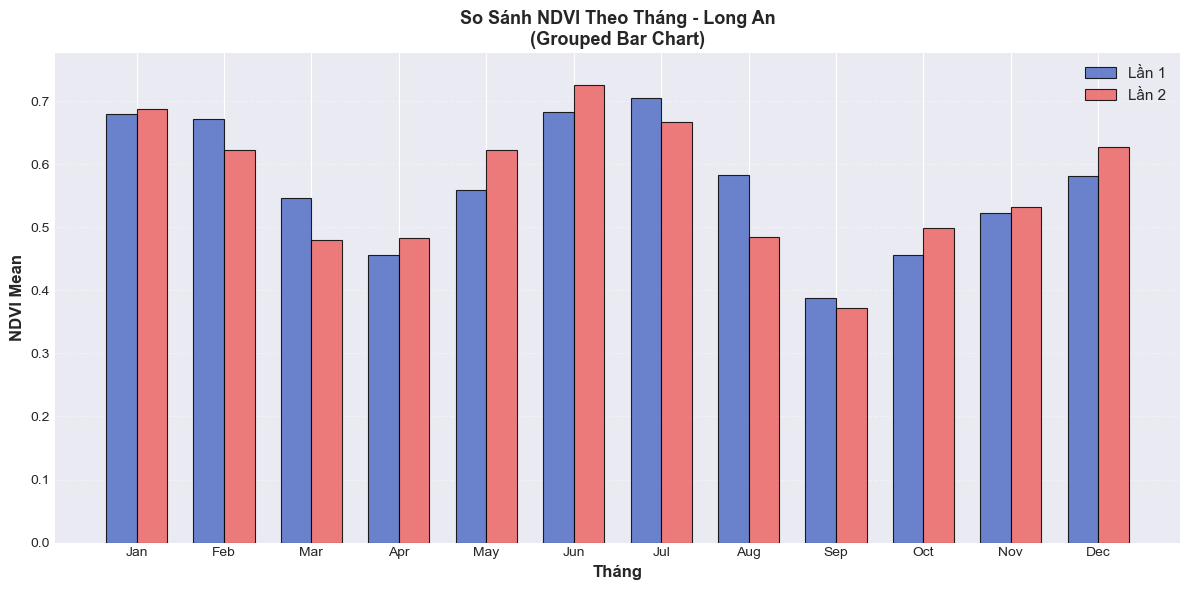


[9/13] Sóc Trăng


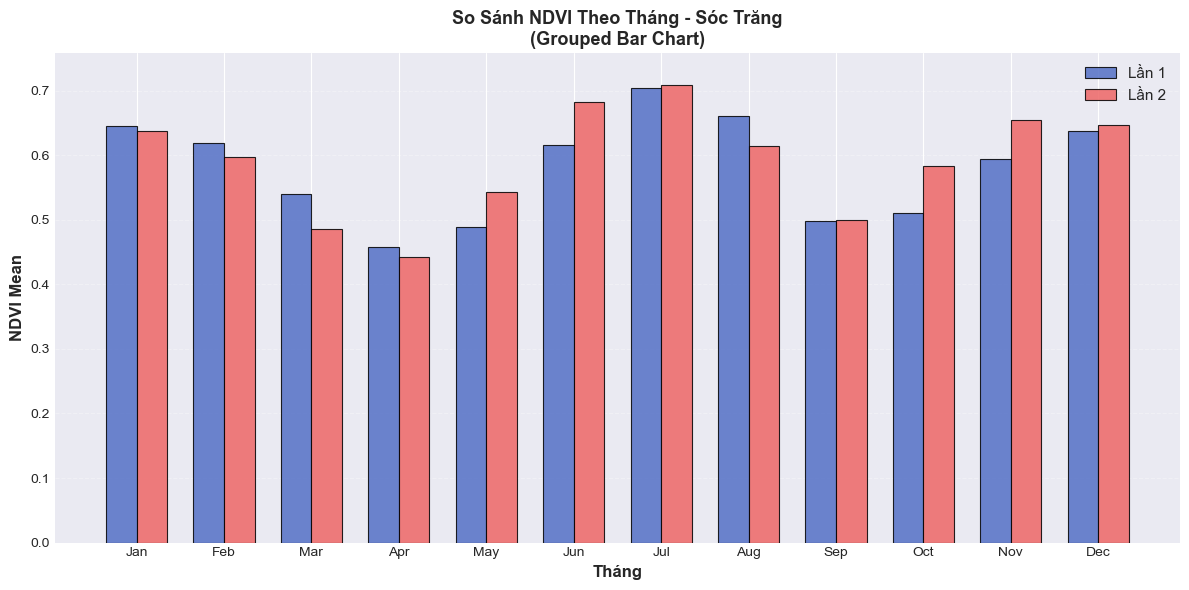


[10/13] Tiền Giang


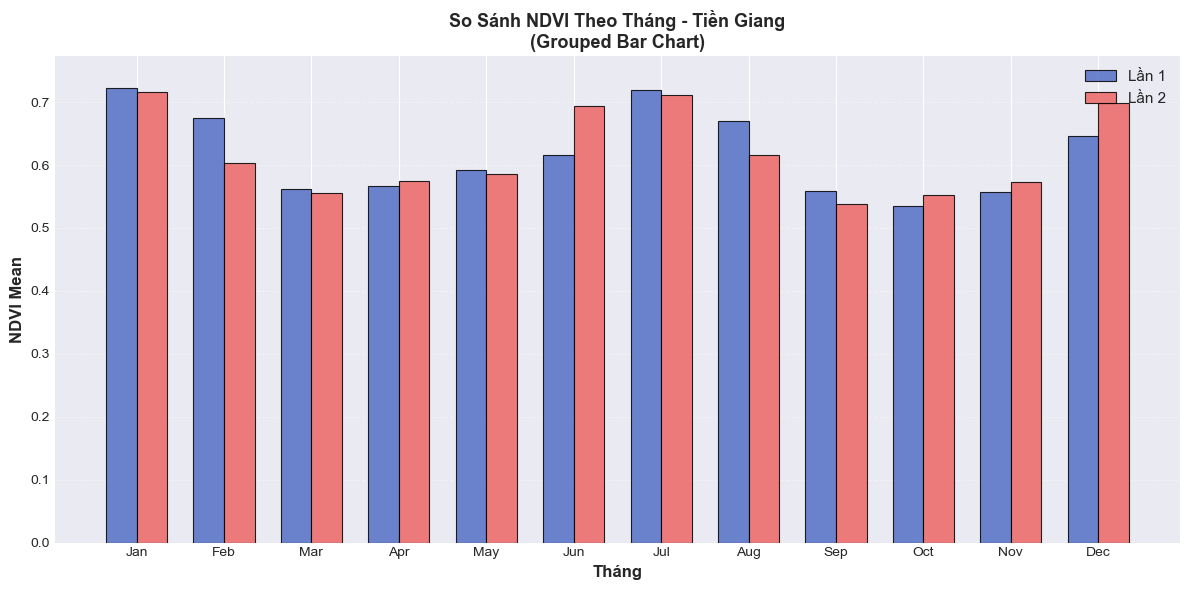


[11/13] Trà Vinh


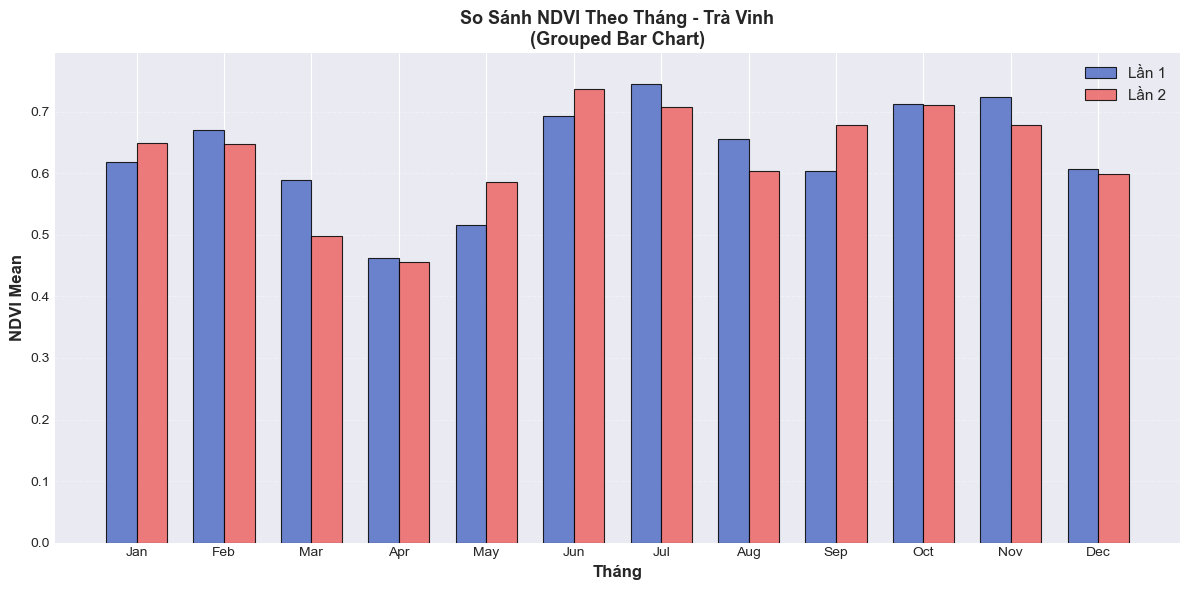


[12/13] Vĩnh Long


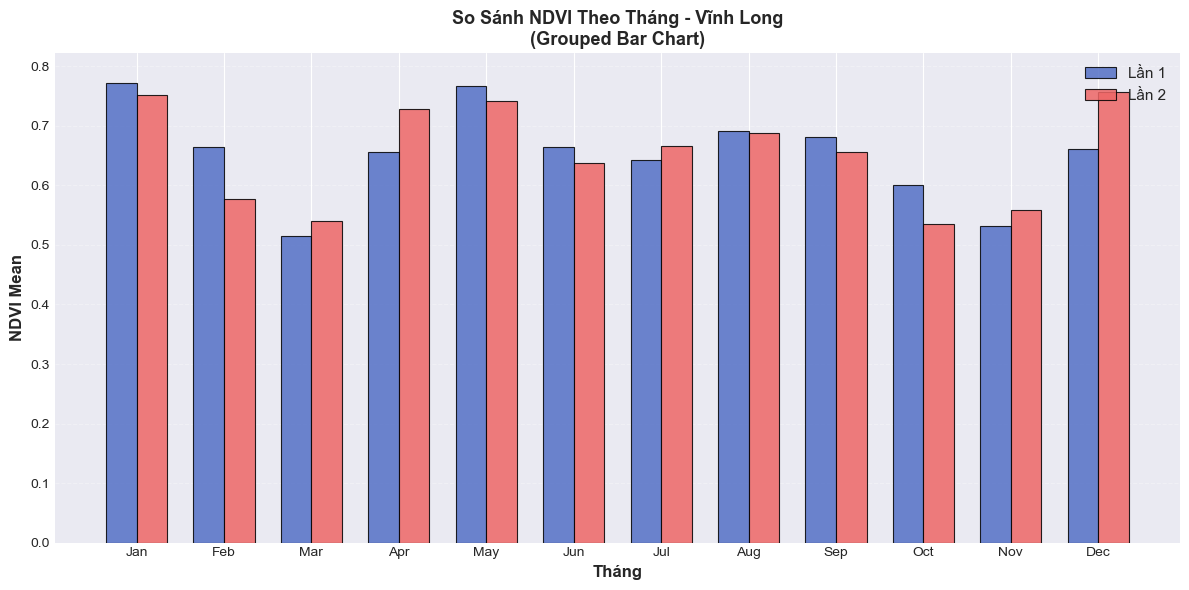


[13/13] Đồng Tháp


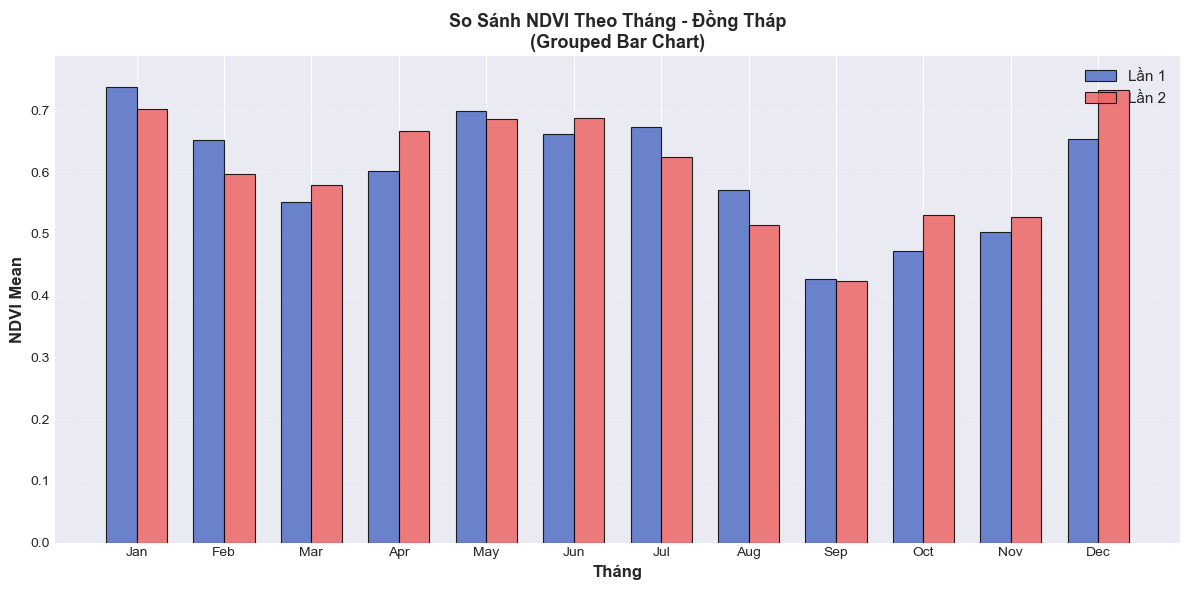

In [ ]:
print(f"Đang vẽ grouped bar chart cho {len(provinces)} tỉnh...\n")
print("="*80)

for idx, province in enumerate(provinces, 1):
    print(f"[{idx}/{len(provinces)}] {province}")
    fig = plot_province_grouped_bar(province, figsize=(12, 6))
    if fig:
        plt.show()
    print()


## 5. Vẽ Nhiều Tỉnh Trên Lưới (Grid Layout)

Hiển thị nhiều tỉnh cùng lúc để dễ so sánh

Vẽ 13 tỉnh trên lưới 3 cột...



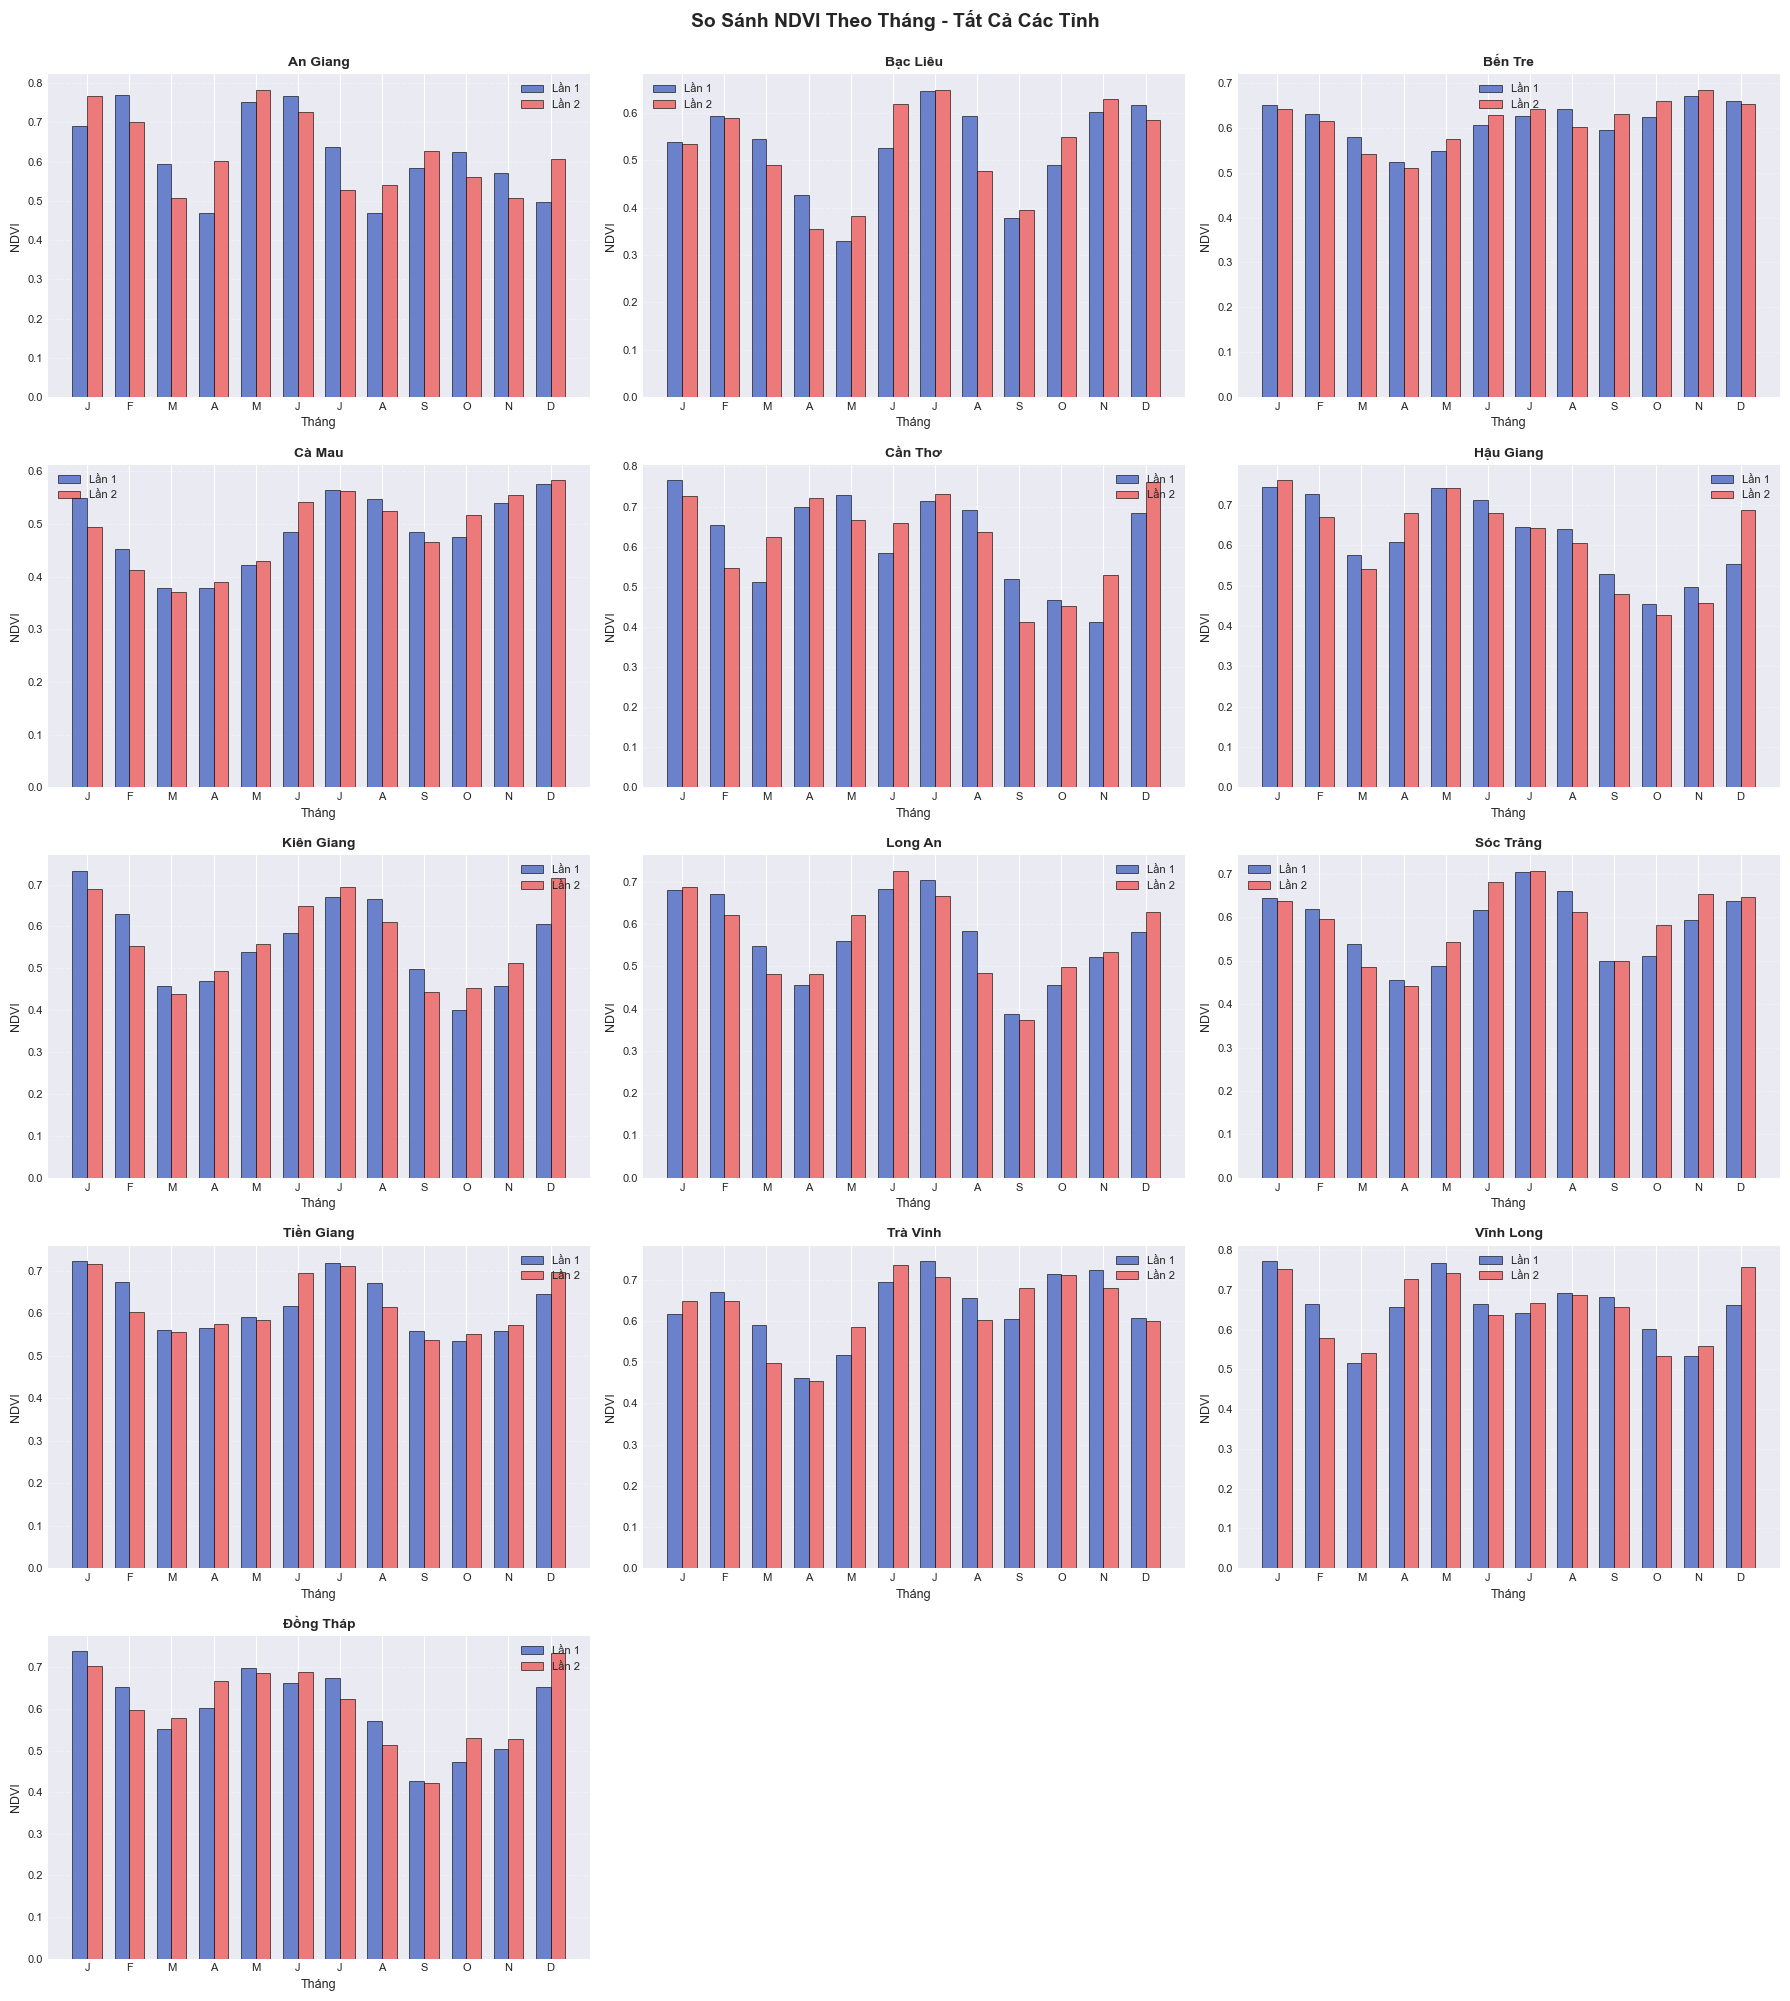

In [ ]:
def plot_provinces_grid(provinces_list, ncols=3, figsize_per_plot=(6, 4)):
    """
    Vẽ nhiều tỉnh trên lưới
    """
    n_provinces = len(provinces_list)
    nrows = int(np.ceil(n_provinces / ncols))
    
    fig, axes = plt.subplots(nrows, ncols, 
                             figsize=(figsize_per_plot[0]*ncols, figsize_per_plot[1]*nrows))
    axes = axes.ravel() if n_provinces > 1 else [axes]
    
    months_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    x = np.arange(1, 13)
    width = 0.35
    
    for idx, province in enumerate(provinces_list):
        # Get data
        data = monthly_by_province[monthly_by_province['NAME_1'] == province].copy()
        all_months = pd.DataFrame({'month': range(1, 13)})
        data = all_months.merge(data, on='month', how='left')
        
        # Plot
        axes[idx].bar(x - width/2, data['mean_1'], width, label='Lần 1', 
                     color='#5470C6', alpha=0.85, edgecolor='black', linewidth=0.5)
        axes[idx].bar(x + width/2, data['mean_2'], width, label='Lần 2', 
                     color='#EE6666', alpha=0.85, edgecolor='black', linewidth=0.5)
        
        axes[idx].set_xlabel('Tháng', fontsize=9)
        axes[idx].set_ylabel('NDVI', fontsize=9)
        axes[idx].set_title(province, fontweight='bold', fontsize=10)
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(months_labels, fontsize=8)
        axes[idx].legend(fontsize=8, loc='best')
        axes[idx].grid(alpha=0.3, axis='y', linestyle='--')
        axes[idx].tick_params(labelsize=8)
    
    # Hide empty subplots
    for idx in range(n_provinces, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('So Sánh NDVI Theo Tháng - Tất Cả Các Tỉnh', 
                 fontweight='bold', fontsize=14, y=0.998)
    plt.tight_layout()
    
    return fig

# Vẽ tất cả tỉnh trên lưới
print(f"Vẽ {len(provinces)} tỉnh trên lưới 3 cột...\n")
fig = plot_provinces_grid(provinces, ncols=3)
plt.show()


## 6. Vẽ Theo Nhóm Tỉnh

Chia 13 tỉnh thành 2 nhóm (9 tỉnh/nhóm)

Nhóm 1/2: 9 tỉnh
Các tỉnh: An Giang, Bạc Liêu, Bến Tre, Cà Mau, Cần Thơ, Hậu Giang, Kiên Giang, Long An, Sóc Trăng


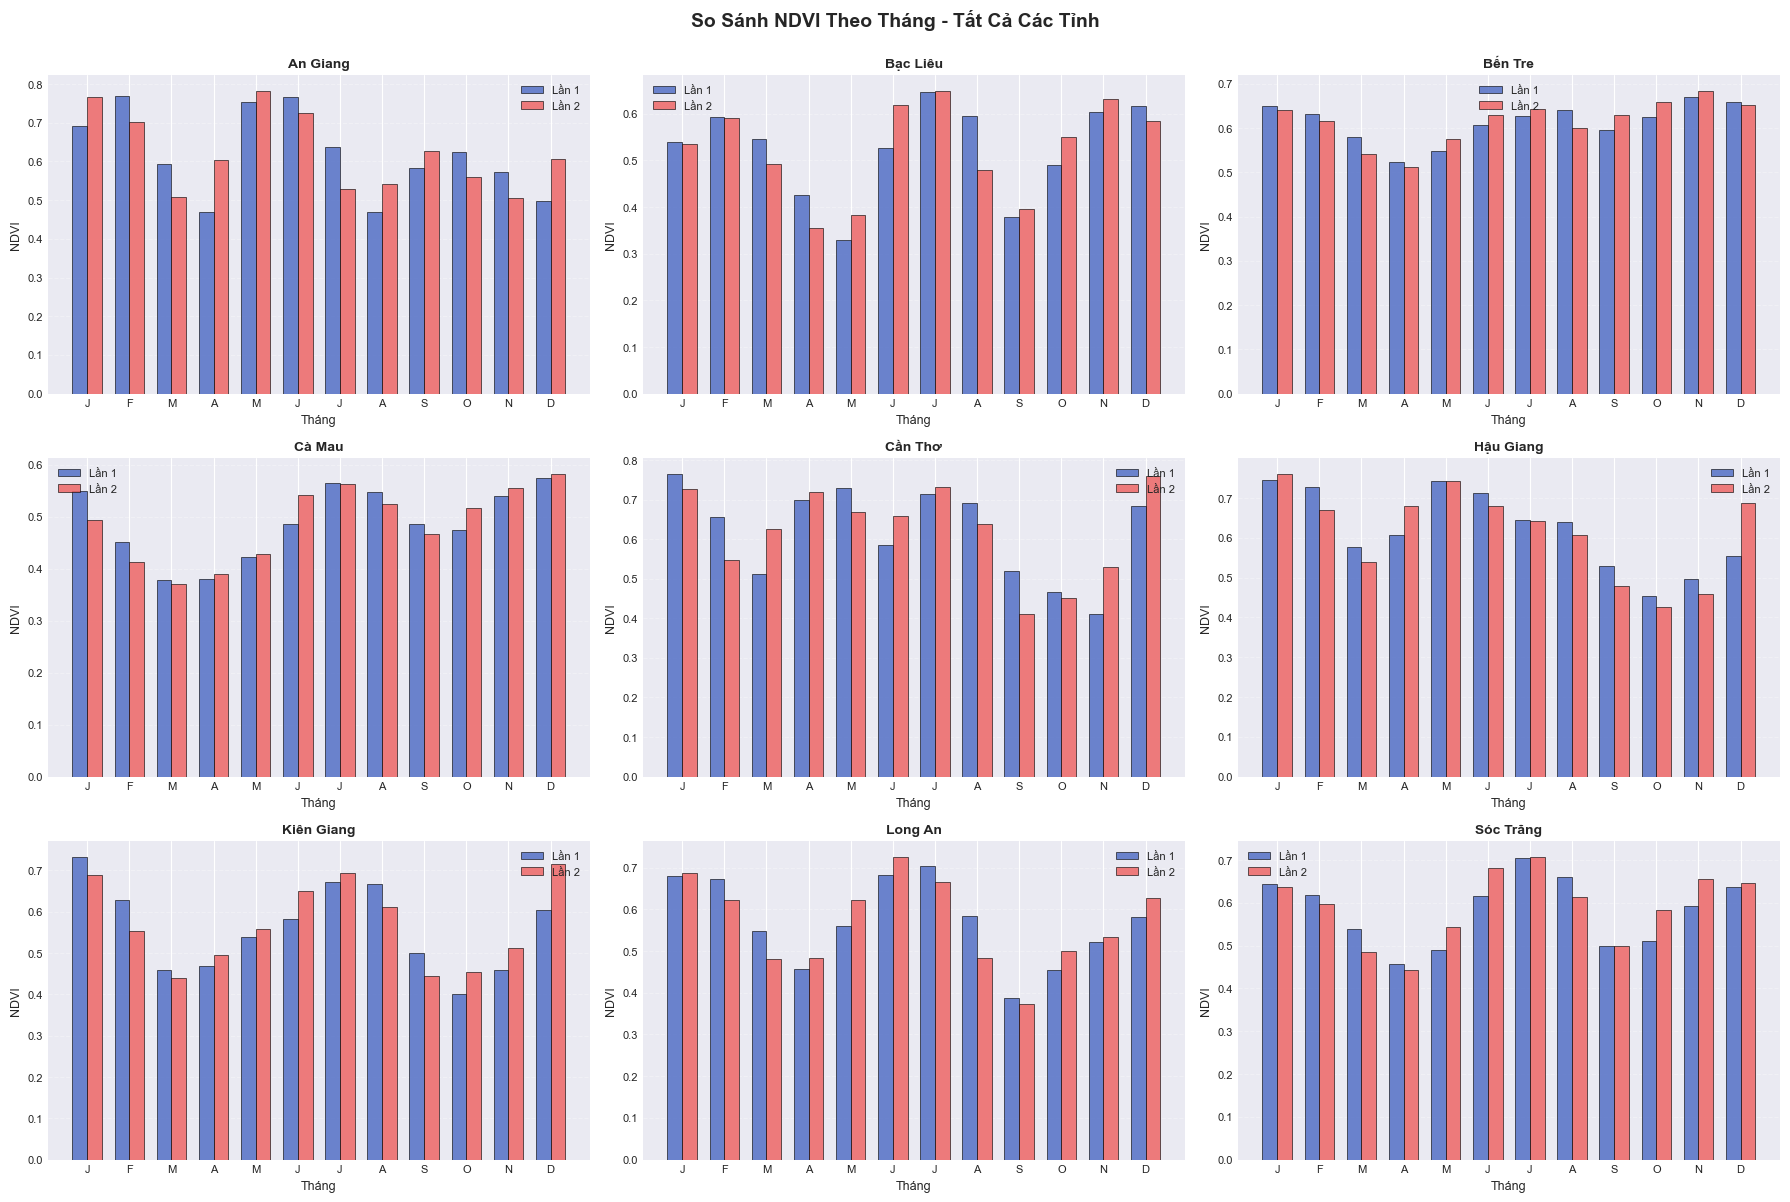


Nhóm 2/2: 4 tỉnh
Các tỉnh: Tiền Giang, Trà Vinh, Vĩnh Long, Đồng Tháp


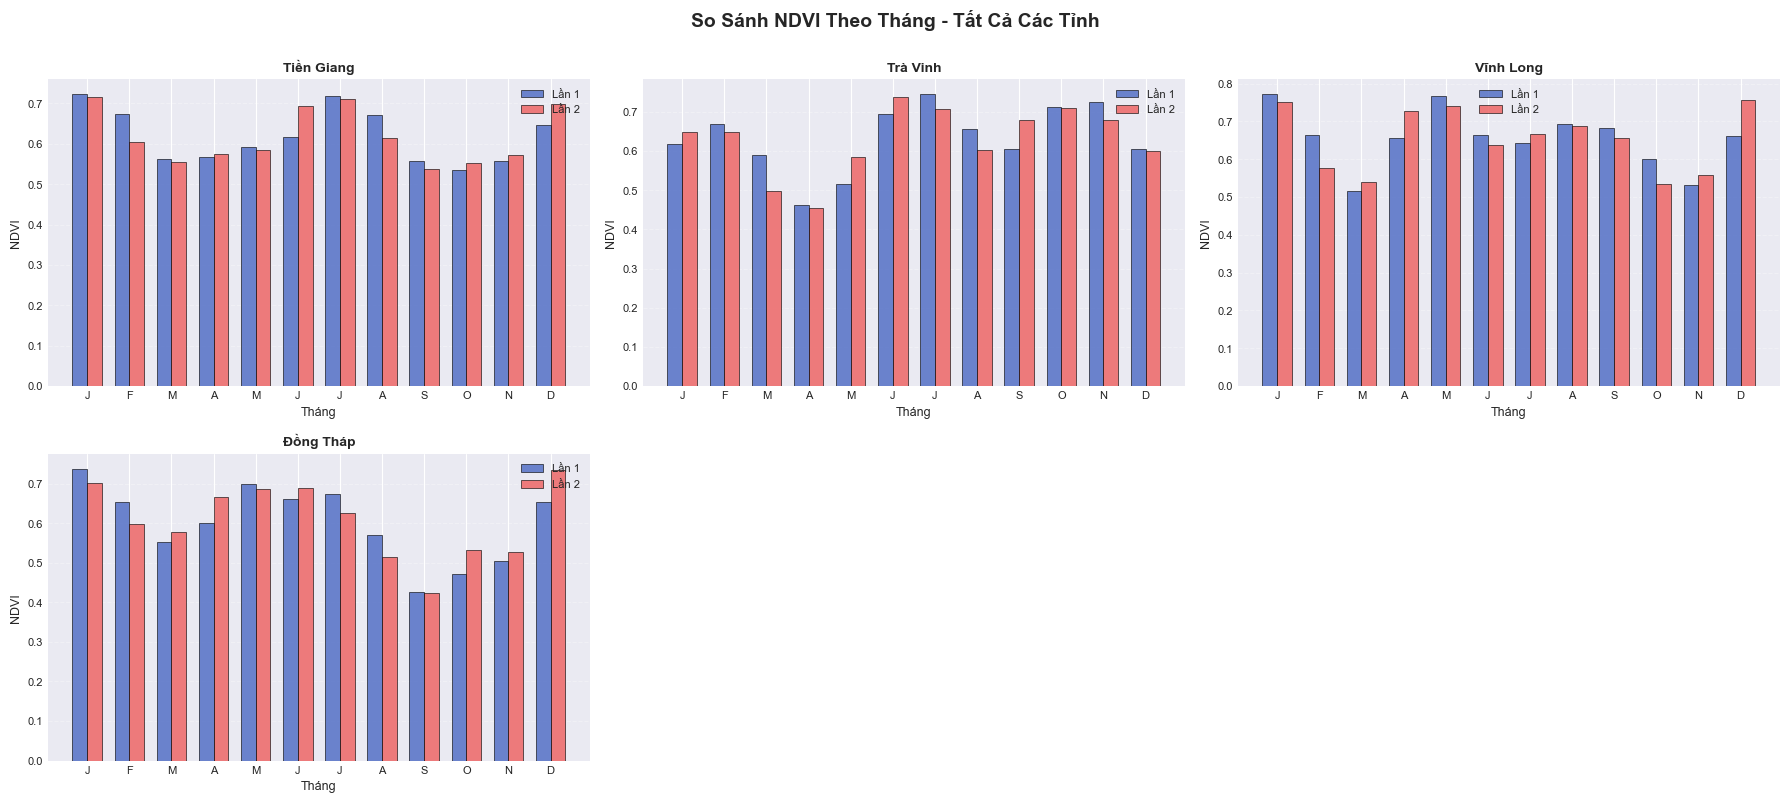

In [ ]:
# Chia tỉnh thành các nhóm để dễ xem hơn
n_provinces = len(provinces)
provinces_per_group = 9  # 3x3 grid
n_groups = int(np.ceil(n_provinces / provinces_per_group))

print(f"Chia {n_provinces} tỉnh thành {n_groups} nhóm ({provinces_per_group} tỉnh/nhóm)\n")

for group_idx in range(n_groups):
    start_idx = group_idx * provinces_per_group
    end_idx = min((group_idx + 1) * provinces_per_group, n_provinces)
    group_provinces = provinces[start_idx:end_idx]
    
    print(f"Nhóm {group_idx + 1}/{n_groups}: {len(group_provinces)} tỉnh")
    print(f"Các tỉnh: {', '.join(group_provinces)}")
    
    fig = plot_provinces_grid(group_provinces, ncols=3, figsize_per_plot=(6, 4))
    plt.show()
    print()


## 7. Chọn Tỉnh Cụ Thể Để Vẽ

In [ ]:
# Danh sách tất cả tỉnh
print("Danh sách tất cả các tỉnh:")
print("="*80)
for i, prov in enumerate(provinces, 1):
    print(f"{i:2d}. {prov}")


Danh sách tất cả các tỉnh:
 1. An Giang
 2. Bạc Liêu
 3. Bến Tre
 4. Cà Mau
 5. Cần Thơ
 6. Hậu Giang
 7. Kiên Giang
 8. Long An
 9. Sóc Trăng
10. Tiền Giang
11. Trà Vinh
12. Vĩnh Long
13. Đồng Tháp


Vẽ biểu đồ cho: An Giang



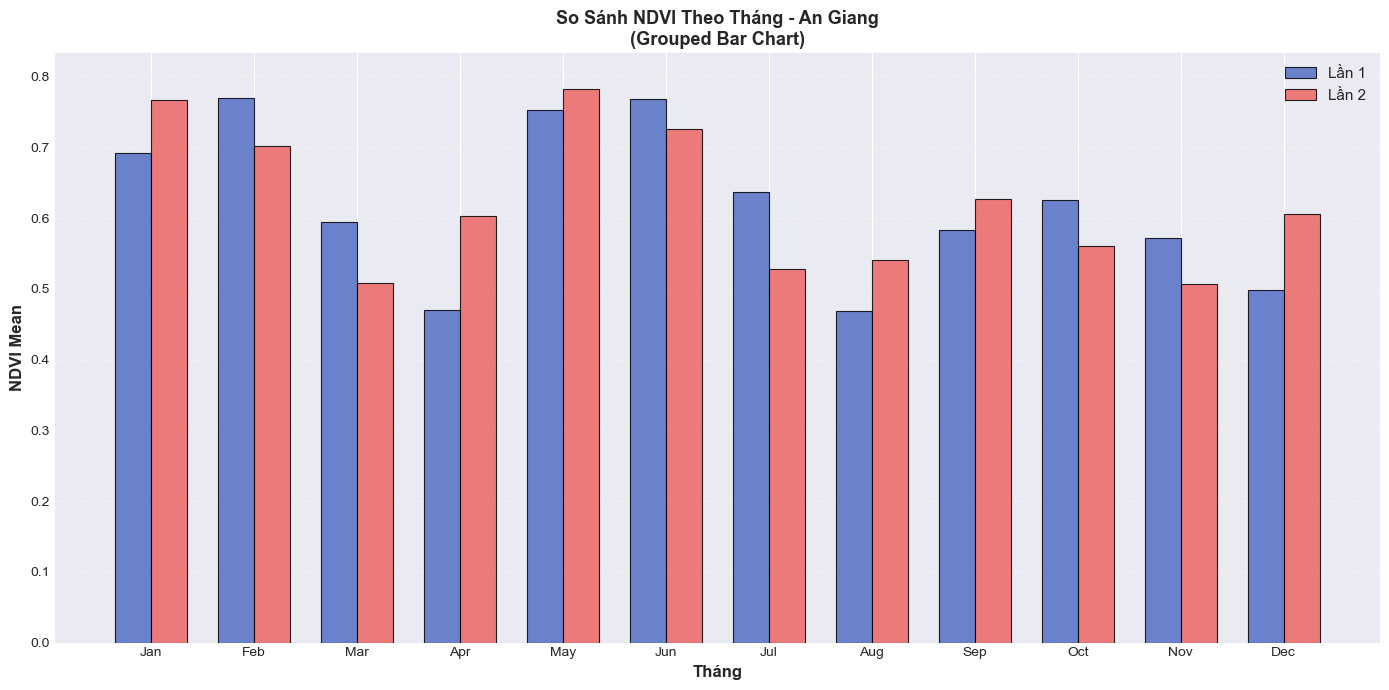

In [ ]:
# Vẽ tỉnh cụ thể (thay đổi tên tỉnh ở đây)
selected_province = 'An Giang'  # Thay tên tỉnh bạn muốn

if selected_province in provinces:
    print(f"Vẽ biểu đồ cho: {selected_province}\n")
    fig = plot_province_grouped_bar(selected_province, figsize=(14, 7))
    if fig:
        plt.show()
else:
    print(f"⚠️ Không tìm thấy tỉnh: {selected_province}")
    print(f"Vui lòng chọn từ danh sách: {provinces}")


## 8. Vẽ Một Số Tỉnh Đặc Biệt

Vẽ 2 tỉnh quan trọng...



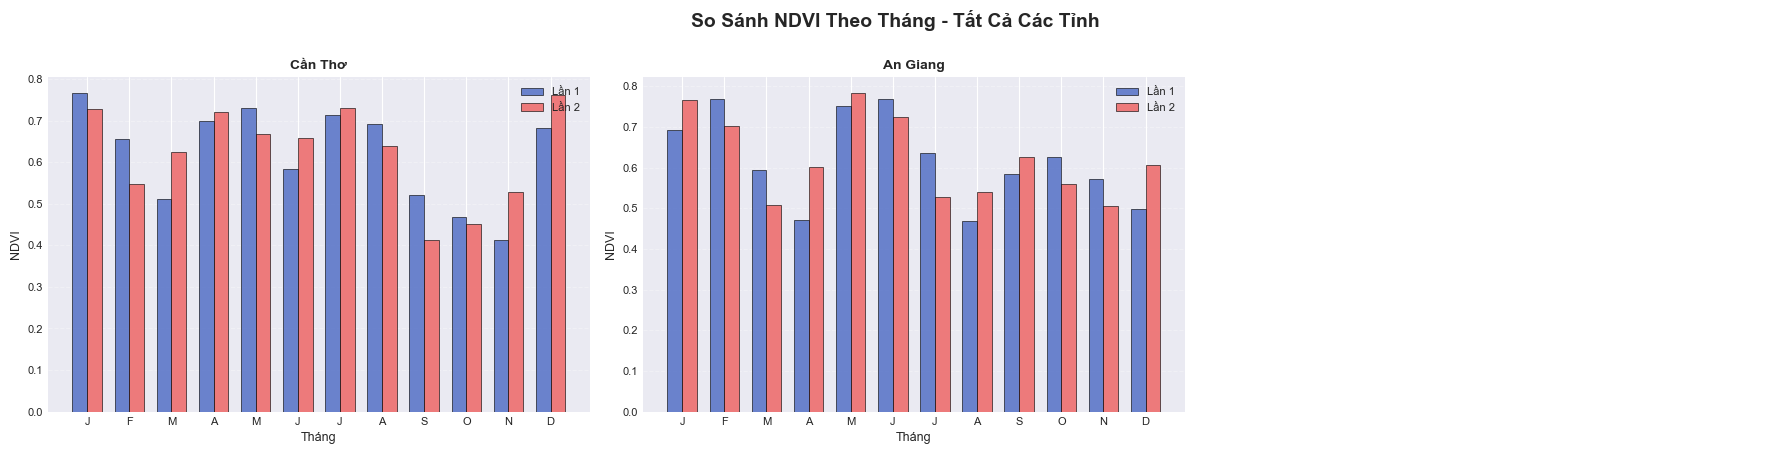

In [ ]:
# Vẽ các tỉnh lớn/quan trọng
important_provinces = [
    'Hà Nội', 
    'TP. Hồ Chí Minh',
    'Đà Nẵng',
    'Cần Thơ',
    'An Giang',
    'Thanh Hóa'
]

# Filter only existing provinces
existing_important = [p for p in important_provinces if p in provinces]

if len(existing_important) > 0:
    print(f"Vẽ {len(existing_important)} tỉnh quan trọng...\n")
    fig = plot_provinces_grid(existing_important, ncols=3, figsize_per_plot=(6, 4.5))
    plt.show()
else:
    print("⚠️ Không tìm thấy tỉnh nào trong danh sách quan trọng")


## 9. Bảng Dữ Liệu Tổng Hợp

In [ ]:
# Pivot table
pivot_obs1 = monthly_by_province.pivot(index='NAME_1', columns='month', values='mean_1')
pivot_obs2 = monthly_by_province.pivot(index='NAME_1', columns='month', values='mean_2')
diff_pivot = pivot_obs2 - pivot_obs1

print("="*80)
print("NDVI MEAN - LẦN 1 (theo tháng)")
print("="*80)
print(pivot_obs1.round(4).to_string())

print("\n" + "="*80)
print("NDVI MEAN - LẦN 2 (theo tháng)")
print("="*80)
print(pivot_obs2.round(4).to_string())

print("\n" + "="*80)
print("CHÊNH LỆCH (LẦN 2 - LẦN 1)")
print("="*80)
print(diff_pivot.round(4).to_string())


NDVI MEAN - LẦN 1 (theo tháng)
month           1       2       3       4       5       6       7       8       9       10      11      12
NAME_1                                                                                                    
An Giang    0.6920  0.7699  0.5942  0.4700  0.7528  0.7678  0.6362  0.4691  0.5832  0.6256  0.5721  0.4982
Bạc Liêu    0.5388  0.5930  0.5460  0.4260  0.3295  0.5253  0.6469  0.5937  0.3776  0.4894  0.6031  0.6163
Bến Tre     0.6508  0.6312  0.5804  0.5245  0.5481  0.6059  0.6272  0.6417  0.5962  0.6240  0.6710  0.6593
Cà Mau      0.5485  0.4514  0.3780  0.3792  0.4224  0.4851  0.5645  0.5472  0.4853  0.4748  0.5405  0.5751
Cần Thơ     0.7657  0.6553  0.5122  0.6981  0.7292  0.5843  0.7135  0.6913  0.5202  0.4672  0.4117  0.6829
Hậu Giang   0.7446  0.7267  0.5760  0.6074  0.7418  0.7124  0.6447  0.6394  0.5293  0.4546  0.4956  0.5537
Kiên Giang  0.7334  0.6287  0.4588  0.4687  0.5380  0.5834  0.6710  0.6666  0.4994  0.4018  0.4583  0.6050
Long A

## 10. Export Kết Quả

In [ ]:
# Save data
monthly_by_province.to_csv('ndvi_monthly_by_province.csv', index=False, encoding='utf-8-sig')
pivot_obs1.to_csv('ndvi_obs1_monthly_pivot.csv', encoding='utf-8-sig')
pivot_obs2.to_csv('ndvi_obs2_monthly_pivot.csv', encoding='utf-8-sig')
diff_pivot.to_csv('ndvi_diff_monthly_pivot.csv', encoding='utf-8-sig')

print("✓ Đã lưu các file CSV:")
print("  - ndvi_monthly_by_province.csv")
print("  - ndvi_obs1_monthly_pivot.csv")
print("  - ndvi_obs2_monthly_pivot.csv")
print("  - ndvi_diff_monthly_pivot.csv")


✓ Đã lưu các file CSV:
  - ndvi_monthly_by_province.csv
  - ndvi_obs1_monthly_pivot.csv
  - ndvi_obs2_monthly_pivot.csv
  - ndvi_diff_monthly_pivot.csv
